# Data Preprocessing

In [2]:
import pandas as pd

df = pd.read_json('./../../raw_data/IMDB_reviews.json', lines=True)
df.head()

,is_spoiler,movie_id,rating,review_date,review_summary,review_text,user_id
0,True,tt0111161,10,10 February 2006,A classic piece of unforgettable film-making.,"In its Oscar year, Shawshank Redemption (writt...",ur1898687
1,True,tt0111161,10,6 September 2000,Simply amazing. The best film of the 90's.,The Shawshank Redemption is without a doubt on...,ur0842118
2,True,tt0111161,8,3 August 2001,The best story ever told on film,I believe that this film is the best story eve...,ur1285640
3,True,tt0111161,10,1 September 2002,Busy dying or busy living?,"**Yes, there are SPOILERS here**This film has ...",ur1003471
4,True,tt0111161,8,20 May 2004,"Great story, wondrously told and acted",At the heart of this extraordinary movie is a ...,ur0226855


In [3]:
# Check the size of the dataframe
df.shape

(573913, 7)

In [4]:
# Check the balance of the project
df.is_spoiler.value_counts()

False    422989
True     150924
Name: is_spoiler, dtype: int64

Combine review summary and review text to get the feature of full review

In [13]:
df['full_review'] = (df.review_summary + ' ' + df.review_text)
df = df [['is_spoiler', 'full_review']]
df.head()

,is_spoiler,full_review
0,True,A classic piece of unforgettable film-making. ...
1,True,Simply amazing. The best film of the 90's. The...
2,True,The best story ever told on film I believe tha...
3,True,"Busy dying or busy living? **Yes, there are SP..."
4,True,"Great story, wondrously told and acted At the ..."


In [22]:
from statistics import mean, median
lengths = [len(review) for review in df.full_review]

print(f' The mean length of the reviews is {round(mean(lengths))}')
print(f' The median length of the reviews is {median(lengths)}')

 The mean length of the reviews is 1496
 The median length of the reviews is 1087


(array([4.84180e+04, 2.19552e+05, 1.17355e+05, 6.36630e+04, 3.94760e+04,
        2.59660e+04, 1.81160e+04, 1.28370e+04, 9.02800e+03, 6.82500e+03,
        6.86200e+03, 4.78600e+03, 7.50000e+02, 1.09000e+02, 4.50000e+01,
        2.80000e+01, 2.70000e+01, 1.90000e+01, 1.50000e+01, 1.00000e+01,
        1.00000e+01, 3.00000e+00, 2.00000e+00, 5.00000e+00, 0.00000e+00,
        3.00000e+00, 0.00000e+00, 0.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([   29. ,   528.4,  1027.8,  1527.2,  2026.6,  2526. ,  3025.4,
         3524.8,  4024.2,  4523.6,  5023. ,  5522.4,  6021.8,  6521.2,
         7020.6,  7520. ,  8019.4,  8518.8,  9018.2,  9517.6, 10017. ,
        10516.4, 11015.8, 11515.2, 12014.6, 12514. , 13013.4, 13512.8,
        14012.2, 14511.6, 15011. ]),
 <BarContainer object of 30 artists>)

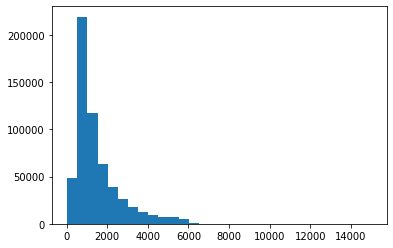

In [28]:
# Check the distirbution of the length of the reviews
import matplotlib.pyplot as plt
plt.hist(lengths, bins=30)

# Remove Punctuation

In [32]:
import string 
def remove_punctuation(df, column):
    clean_df = df.copy()
    clean_texts = []
    for text in clean_df[column]:
        for punctuation in string.punctuation:
            text = text.replace(punctuation, '')
        clean_texts.append(text)
    clean_df[f'clean_{column}'] = clean_texts
    return clean_df

In [33]:
df = remove_punctuation(df, 'full_review')
df.head()

,is_spoiler,full_review,clean_full_review
0,True,A classic piece of unforgettable film-making. ...,A classic piece of unforgettable filmmaking In...
1,True,Simply amazing. The best film of the 90's. The...,Simply amazing The best film of the 90s The Sh...
2,True,The best story ever told on film I believe tha...,The best story ever told on film I believe tha...
3,True,"Busy dying or busy living? **Yes, there are SP...",Busy dying or busy living Yes there are SPOILE...
4,True,"Great story, wondrously told and acted At the ...",Great story wondrously told and acted At the h...


# Remove Numbers

In [34]:
def remove_numbers(df, column):
    clean_df = df.copy()
    clean_df[column] = clean_df[column].map(lambda text: ''.join(word for word in text if not word.isdigit()))
    return clean_df

In [35]:
df = remove_numbers(df, 'clean_full_review')
df.head()

,is_spoiler,full_review,clean_full_review
0,True,A classic piece of unforgettable film-making. ...,A classic piece of unforgettable filmmaking In...
1,True,Simply amazing. The best film of the 90's. The...,Simply amazing The best film of the s The Shaw...
2,True,The best story ever told on film I believe tha...,The best story ever told on film I believe tha...
3,True,"Busy dying or busy living? **Yes, there are SP...",Busy dying or busy living Yes there are SPOILE...
4,True,"Great story, wondrously told and acted At the ...",Great story wondrously told and acted At the h...


# Remove Stop Words

In [36]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/eduardobetancourthernandez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/eduardobetancourthernandez/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/eduardobetancourthernandez/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [38]:
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize

def remove_stop_words(df, column):
    clean_df = df.copy()
    stop_words = set(stopwords.words('english')) 
    clean_texts = []
    for text in clean_df[column]:
        word_tokens = word_tokenize(text) 
        text = [w for w in word_tokens if not w in stop_words] 
        clean_texts.append(text)
    clean_df[column] = clean_texts
    return clean_df

In [40]:
df = remove_stop_words(df, 'clean_full_review')
df.head()

,is_spoiler,full_review,clean_full_review
0,True,A classic piece of unforgettable film-making. ...,"[A, classic, piece, unforgettable, filmmaking,..."
1,True,Simply amazing. The best film of the 90's. The...,"[Simply, amazing, The, best, film, The, Shawsh..."
2,True,The best story ever told on film I believe tha...,"[The, best, story, ever, told, film, I, believ..."
3,True,"Busy dying or busy living? **Yes, there are SP...","[Busy, dying, busy, living, Yes, SPOILERS, her..."
4,True,"Great story, wondrously told and acted At the ...","[Great, story, wondrously, told, acted, At, he..."


# Lower Punctuation

In [44]:
def lower_df(df, column):
    clean_df = df.copy()
    clean_df[column] = clean_df[column].map(lambda x: x.lower())
    return clean_df

In [41]:
from nltk.stem import WordNetLemmatizer


def lemmatize_df(df, column):
    clean_df = df.copy()
    lemmatizer = WordNetLemmatizer()
    lemmatized_texts = []
    for text in clean_df[column]:
        lemmatized = [lemmatizer.lemmatize(word) for word in text]
        lemmatized_texts.append(' '.join(lemmatized))
    clean_df[column] = lemmatized_texts
    return clean_df

In [43]:
# Look at row 2, 'homes' was lemmatized into 'home'
df = lemmatize_df(df, 'clean_full_review')
df.head()

KeyboardInterrupt: 